In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from DataHandler import DataHandler

pd.set_option('display.float_format', lambda x: '%.3f' % x)

dh = DataHandler("ml-20m")

movies = dh.load_movies()
ratings = dh.load_ratings_train()
ratings = ratings.drop(columns = 'timestamp')
genome_scores = dh.load_raw_genome_scores()
genome_tags = dh.load_raw_genome_tags()


In [5]:
ratings = ratings.merge(movies, on='movieId')


In [6]:
ratings.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>userId</th>
      <th>movieId</th>
      <th>rating</th>
      <th>title</th>
      <th>genres</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>50069</td>
      <td>318</td>
      <td>4.500</td>
      <td>Shawshank Redemption, The (1994)</td>
      <td>Crime|Drama</td>
    </tr>
    <tr>
      <th>1</th>
      <td>90685</td>
      <td>318</td>
      <td>5.000</td>
      <td>Shawshank Redemption, The (1994)</td>
      <td>Crime|Drama</td>
    </tr>
    <tr>
      <th>2</th>
      <td>74552</td>
      <td>318</td>
      <td>2.000</td>
      <td>Shawshank Redemption, The (1994)</td>
      <td>Crime|Drama</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53838</td>
      <td>318</td>
      <td>4.000</td>
      <td>Shawshank Redemption, The (1994)</td>
      <td>Crime|Drama</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4489</td>
      <td>318</td>
      <td>5.000</td>
      <td>Shawshank Redemption, The (1994)</td>
      <td>Crime|Drama</td>
    </tr>
  </tbody>
</table>
</div>

In [7]:
ratings.describe()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>userId</th>
      <th>movieId</th>
      <th>rating</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>16000210.000</td>
      <td>16000210.000</td>
      <td>16000210.000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>69050.666</td>
      <td>9040.976</td>
      <td>3.525</td>
    </tr>
    <tr>
      <th>std</th>
      <td>40037.353</td>
      <td>19789.164</td>
      <td>1.052</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1.000</td>
      <td>1.000</td>
      <td>0.500</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>34401.000</td>
      <td>902.000</td>
      <td>3.000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>69151.000</td>
      <td>2167.000</td>
      <td>3.500</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>103638.000</td>
      <td>4769.000</td>
      <td>4.000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>138493.000</td>
      <td>131262.000</td>
      <td>5.000</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
ratings.nunique()

userId     138493
movieId     25827
rating         10
dtype: int64

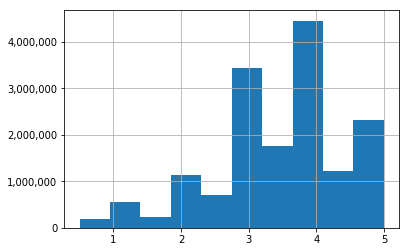

In [ ]:
hist = ratings['rating'].hist()
hist.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

In [25]:
ratings_by_userId_count = ratings.groupby('userId').count()
print("The mean for count of user ratings is %8.2f" % ratings_by_userId_count.mean()[0])
print("The median for count of user ratings is %8.2f" % ratings_by_userId_count.median()[0])

The mean for count of user ratings is   115.53
The median for count of user ratings is    54.00


count   138493.000
mean       115.531
std        184.283
min          9.000
25%         28.000
50%         54.000
75%        124.000
max       7422.000
Name: rating, dtype: float64


{'boxes': [<matplotlib.lines.Line2D at 0x1980f41cc50>],
 'caps': [<matplotlib.lines.Line2D at 0x1980f42a748>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1980f42aeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1980f42add8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1980f41cda0>,
  <matplotlib.lines.Line2D at 0x1980f42a400>]}

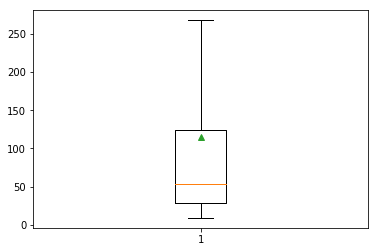

In [27]:
print(ratings_by_userId_count['rating'].describe())
plt.boxplot(ratings_by_userId_count['rating'], showfliers=False, showmeans=True)

In [29]:
ratings['rating'].mean()

3.5254116352222877

In [30]:
#mean rating per movie
ratings[['rating', 'movieId']].groupby('movieId').mean().mean()

rating   3.143
dtype: float64

In [31]:
ratings[['movieId', 'rating']].head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>movieId</th>
      <th>rating</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>318</td>
      <td>4.500</td>
    </tr>
    <tr>
      <th>1</th>
      <td>318</td>
      <td>5.000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>318</td>
      <td>2.000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>318</td>
      <td>4.000</td>
    </tr>
    <tr>
      <th>4</th>
      <td>318</td>
      <td>5.000</td>
    </tr>
  </tbody>
</table>
</div>

In [32]:
ratings.isnull().values.any()

False

More detailed
from https://www.kaggle.com/cesarcf1977/movielens-data-analysis-beginner-s-first/notebook


In [21]:
movies = dh.load_movies()
ratings = dh.load_ratings_train()

# Organise a bit and store into feather-format
movies.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.sort_values(by='movieId', inplace=True)
ratings.reset_index(inplace=True, drop=True)
# Split title and release year in separate columns in movies dataframe. Convert year to timestamp.
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)
movies.title = movies.title.str[:-7]

# Categorize movies genres properly. Working later with +20MM rows of strings proved very resource consuming
genres_unique = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['genre']) # Format into DataFrame to store later
movies = movies.join(movies.genres.str.get_dummies().astype(bool))
movies.drop('genres', inplace=True, axis=1)

# Modify rating timestamp format (from seconds to datetime year)
#ratings.timestamp = pd.to_datetime(ratings.timestamp, unit='s')
ratings.timestamp = pd.to_datetime(ratings.timestamp, infer_datetime_format=True)
ratings.timestamp = ratings.timestamp.dt.year

# Check and clean NaN values
print ("Number of movies Null values: ", max(movies.isnull().sum()))
print ("Number of ratings Null values: ", max(ratings.isnull().sum()))
movies.dropna(inplace=True)
ratings.dropna(inplace=True)
    
# Organise a bit, then save into feather-formatand clear from memory
movies.sort_values(by='movieId', inplace=True)
ratings.sort_values(by='movieId', inplace=True)
movies.reset_index(inplace=True, drop=True)
ratings.reset_index(inplace=True, drop=True)

Number of movies Null values:  22


Number of ratings Null values:  0


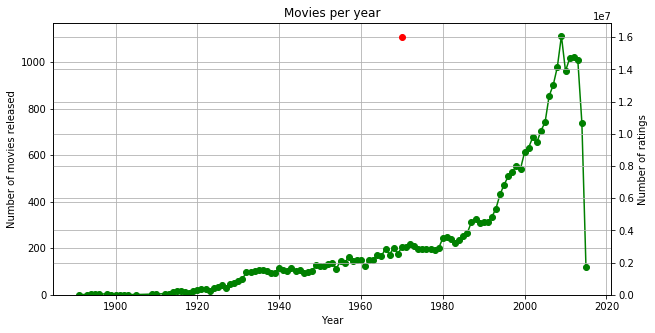

In [14]:
# Let's work with a temp smaller slice 'dftmp' of the original dataframe to reduce runtime (ratings hass +2MM rows)
dftmp = movies[['movieId', 'year']].groupby('year')

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(dftmp.year.first(), dftmp.movieId.nunique(), "g-o")
ax1.grid(None)
ax1.set_ylim(0,)

dftmp = ratings[['rating', 'timestamp']].groupby('timestamp')
ax2 = ax1.twinx()
ax2.plot(dftmp.timestamp.first(), dftmp.rating.count(), "r-o")
ax2.grid(None)
ax2.set_ylim(0,)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released'); ax2.set_ylabel('Number of ratings')
plt.title('Movies per year')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^ax1$|^ax2$)

<Figure size 720x360 with 0 Axes>

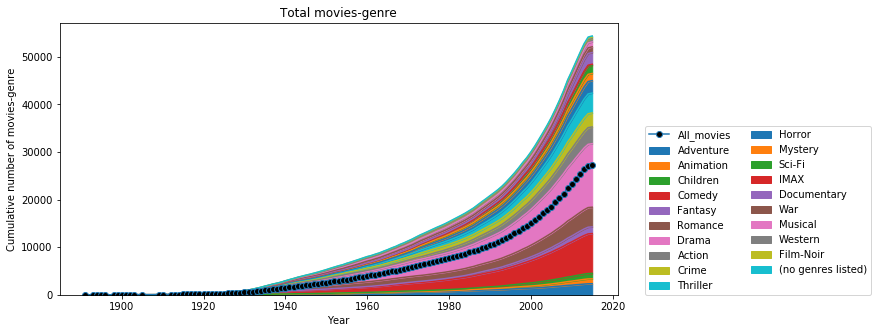

In [ ]:
plt.figure(figsize=(10,5))
dftmp = movies[['movieId', 'year']].groupby('year')
df = pd.DataFrame({'All_movies' : dftmp.movieId.nunique().cumsum()})
# Plot histogram for each individual genre
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]][['movieId', 'year']].groupby('year')
    df[genre]=dftmp.movieId.nunique().cumsum()
df.fillna(method='ffill', inplace=True)
df.loc[:,df.columns!='All_movies'].plot.area(stacked=True, figsize=(10,5))
# Plot histogram for all movies
plt.plot(df['All_movies'], marker='o', markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Cumulative number of movies-genre')
plt.title('Total movies-genre') # Many movies have multiple genres, so counthere is higher than number of movies
plt.legend(loc=(1.05,0), ncol=2)
plt.show()
# Plot simple scatter of the number of movies tagged with each genre
plt.figure(figsize=(15,5))
barlist = df.iloc[-1].plot.bar()
barlist.patches[0].set_color('b') # Color 'All_movies' differently, as it's not a genre tag count
plt.xticks(rotation='vertical')
plt.title('Movies per genre tag')
plt.xlabel('Genre')
plt.ylabel('Number of movies tagged')
plt.show()

# Housekeeping
%reset_selective -f (^barlist$|^dftmp$|^genre$)

In [18]:
dftmp = ratings[['movieId','rating']].groupby('movieId').mean()

# Initialize empty list to capture basic stats by gere
rating_stats = []
# Plot general histogram of all ratings
dftmp.hist(bins=25, grid=False, edgecolor='b', normed=True, label ='All genres', figsize=(10,5))
# Plot histograms (kde lines for better visibility) per genre
for genre in genres_unique.genre:
    dftmp = movies[movies[genre]==True]
    dftmp = ratings[ratings.set_index('movieId').index.isin(dftmp.set_index('movieId').index)]
    dftmp = dftmp[['movieId','rating']].groupby('movieId').mean()
    dftmp.rating.plot(grid=False, alpha=0.6, kind='kde', label=genre)
    avg = dftmp.rating.mean()
    std = dftmp.rating.std()
    rating_stats.append((genre, avg, std))
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

# Housekeeping
%reset_selective -f (^avg$|^dftmp$|^genre$|^std$)

NameError: name 'np' is not defined

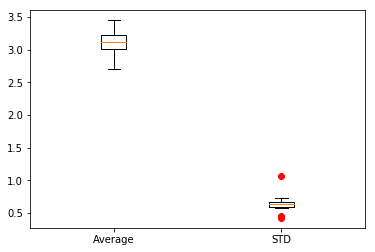

In [19]:
# Construct a DataFrame with all the basic stats per genre
rating_sum = pd.DataFrame(rating_stats,  columns=['genre', 'average', 'std_dev'])
rating_sum.set_index('genre', inplace=True)
# Display a boxplot to show the dispersion of average and standard deviation
bxplot = plt.boxplot(rating_sum.T, labels=['Average', 'STD'], sym="ro")
# Properly label the outliers
outliers = []
for i, value in enumerate(bxplot['fliers']):
    for val in value.get_ydata():
        bxplot_label = rating_sum.index[rating_sum.iloc[:, i] == val][0]
        outliers.append(bxplot_label)
        plt.annotate(bxplot_label, xy=(i+1.1, val+np.random.uniform(-0.25,0.25))) # Trick to prevent overlapping
outliers = set(outliers)
plt.ylim(0,)
plt.ylabel('Movie rating')
plt.title('Movie rating descriptive stats')
plt.show()

# Bar chart with average rating, standard deviation and normalized number of ratings per genre
# Calculate the normalized number of ratings per genre
rating_sum['num_ratings_norm']=df.iloc[-1, 1:]/df.iloc[-1, 1:].sum()
# Calculate the average rating for all genres
rating_sum['average_all']=rating_sum.average.mean()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

rating_sum[['average', 'std_dev']].plot(kind='bar', color=['b','r'], ax=ax, position=0.5, grid=False)
rating_sum['average_all'].plot(kind='line',style='--', color=['black'], ax=ax, grid=False)
rating_sum['num_ratings_norm'].plot(kind='line', color='g', ax=ax2, grid=False, linewidth=3)

ax.legend(loc=2)
ax2.legend(loc=1)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Movie rating descriptive stats')
plt.autoscale()
ax2.set_ylim(0,)
plt.show()

print("Outliers: ", outliers)
print(rating_sum.T)

# Quick pie chart to visualize how 3 genres take almost 50% of ratings
rating_sum.sort_values(by='num_ratings_norm', inplace=True)
plt.pie(rating_sum['num_ratings_norm'], labels=rating_sum.T.columns, labeldistance=1.5)
plt.show()


# Housekeeping
%reset_selective -f (^avg$|ax|bxplot|^df$|^dftmp$|^i$|^rating_stats$|^rating_sum$|^val$|^value$)

In [23]:
dftmp = movies[['movieId', 'year']].set_index('movieId').join(
    ratings[['movieId','rating']].groupby('movieId').mean())

plt.figure(figsize=(10,5))
plt.plot(dftmp.year, dftmp.rating,"g.", markersize=4)
plt.xlabel('Year')
plt.ylabel('Movie average rating')
plt.title('All movies rating')
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

In [27]:
plt.figure(figsize=(10,5))
# For each genre
for genre in genres_unique.genre:
    # Select only movies matching current genre. Pick only movieId (as index) and year.
    dftmp = movies[movies[genre]==True][['movieId', 'year']].set_index('movieId')
    # Selects ratings, with movieId as index. Select only movies that match also the previous step. Join both.
    dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                       .groupby('movieId').mean())
    # Now we have a df of movieId, year and multiple ratings. Group by year and compute the average rating.
    dftmp = dftmp.groupby('year').mean()
    plt.plot(dftmp, label = genre, alpha=0.7)

# For all genres
dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "o", label='All genres', color='black')

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average rating per year per genre')
plt.legend(loc=(1.05,0), ncol=2)
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$)


In [27]:
plt.figure(figsize=(10,5))
for genre in outliers:
    # Select only movies matching current genre. Pick only movieId (as index) and year.
    dftmp = movies[movies[genre]==True][['movieId', 'year']].set_index('movieId')
    # Selects ratings, with movieId as index. Select only movies that match also the previous step. Join both.
    dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                       .groupby('movieId').mean())
    # Now we have a df of movieId, year and multiple ratings. Group by year and compute the average rating.
    dftmp = dftmp.groupby('year').mean()
    plt.plot(dftmp, label = genre, alpha=0.7)

# For all genres
dftmp = movies[['movieId', 'year']].set_index('movieId')
dftmp = dftmp.join(ratings[ratings.set_index('movieId').index.isin(dftmp.index)][['movieId', 'rating']]
                   .groupby('movieId').mean())
dftmp = dftmp.groupby('year').mean()
plt.plot(dftmp, "o", label='All genres', color='black')
    
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average rating per year (outlier genres)')
plt.legend(loc=(1.05,0), ncol=2)
plt.ylim(0,)
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^genre$|^outliers$)


NameError: name 'outliers' is not defined

<Figure size 720x360 with 0 Axes>

In [ ]:
dftmp = ratings[['userId','rating']].groupby('userId').mean()
# Plot histogram
dftmp.plot(kind='hist', bins=50, grid=0, normed=True, edgecolor='black', figsize=(10,5))
# Plot cumulative function on top (couldn't do any other way)
# evaluate the histogram
values, base = np.histogram(dftmp, bins=40, normed=True)
# evaluate the cumulative (multiply by the average distance between points in the x-axis to get UNIT area)
cumulative = np.cumsum(values) * np.diff(base).mean()
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue', label='CDF')
plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$|^base$|^cumulative$|^values$)

In [ ]:
# Combine movies year with ratings timestamps
dftmp = movies[['movieId', 'year']].merge(ratings[['movieId', 'timestamp']], on='movieId')
dftmp = dftmp.groupby(['year', 'timestamp']).count().reset_index()
dftmp.columns=['year', 'timestamp', 'count']
dftmp = dftmp.pivot('year', 'timestamp')

# Plot using a contour (color reflects number of ratings for each year-timestamp pair).
# Could also use heatmap or imshow...
X=dftmp.columns.levels[1].values
Y=dftmp.index.values
Z=dftmp.values
Xi,Yi = np.meshgrid(X, Y)

fig, axs = plt.subplots(2,2)
fig.set_size_inches(14,7)
cutoff = [np.nanmax(Z), 50000, 25000, 10000] # Modify the contour plots a different max values.
Zcap = np.copy(Z)
locx = [0.45, 0.91, 0.45, 0.91] # x location for the individual colorbars
locy = [0.53, 0.53, 0.1, 0.1] # y location for the individual colorbar
for i, ax in enumerate(axs.flatten()):
    Zcap[Zcap>cutoff[i]]=cutoff[i]
    cmvals = ax.contourf(Yi, Xi, Zcap, 100, cmap=plt.cm.spectral)
    ax.set_xlabel('Movie year')
    ax.set_ylabel('Rating timestamp')
    ax.set_title('Cutoff value: %s ratings' %cutoff[i], fontsize=10)
    cax = fig.add_axes([locx[i], locy[i], 0.015, 0.35])
    fig.colorbar(cmvals, cax=cax, orientation='vertical')
fig.suptitle('Ratings per movie-year', fontsize=15)
plt.subplots_adjust(hspace=0.35,wspace=0.45)

# Highlight key regions in the plots, just roughly...
axs.flatten()[2].plot([1980, 1995, 2015, 1998, 1980], [1998, 2014.5, 2014.5, 1998, 1998], 
                      '--', color='black',linewidth=3)
axs.flatten()[3].plot([1970, 1985, 2015, 1998, 1970], [1998, 2014.5, 2014.5, 1998, 1998], 
                      '--', color='black',linewidth=3)
plt.show()

# Housekeeping
%reset_selective -f (^ax$|^axs$|^cmvals$|^cutoff$|^dftmp$|^i$|loc|X|Y|Z)

In [ ]:
# Combine movies year with ratings timestamps
dftmp = movies[['movieId', 'year']].merge(ratings[['movieId', 'timestamp', 'rating']], on='movieId')
dftmp.drop('movieId', axis=1, inplace=True)
dftmp = dftmp.groupby(['year', 'timestamp']).mean().reset_index().pivot('year', 'timestamp')

# Plot using a contour (color reflects number of ratings for each year-timestamp pair).
# Could also use heatmap or imshow...
X=dftmp.columns.levels[1].values
Y=dftmp.index.values
Z=dftmp.values
Xi,Yi = np.meshgrid(X, Y)

fig, axs = plt.subplots(2,2)
fig.set_size_inches(14,7)
cutoff = [4.5, 4, 3.5, 3] # Modify the contour plots a different max values.
Zcap = np.copy(Z)
locx = [0.45, 0.91, 0.45, 0.91] # x location for the individual colorbars
locy = [0.53, 0.53, 0.1, 0.1] # y location for the individual colorbar
for i, ax in enumerate(axs.flatten()):
    Zcap[Zcap>cutoff[i]]=cutoff[i]
    cmvals = ax.contourf(Yi, Xi, Zcap, 100, cmap=plt.cm.spectral)
    ax.set_xlabel('Movie year')
    ax.set_ylabel('Rating timestamp')
    ax.set_title('Cutoff rating value: %s' %cutoff[i], fontsize=10)
    cax = fig.add_axes([locx[i], locy[i], 0.015, 0.35])
    fig.colorbar(cmvals, cax=cax, orientation='vertical')
fig.suptitle('Average rating per movie-year', fontsize=15)
plt.subplots_adjust(hspace=0.35,wspace=0.45)

# Highlight key regions in the plots, just roughly...
axs.flatten()[0].plot([1980, 1980, 2015, 1998, 1980], [1996, 2014.5, 2014.5, 1996, 1996], 
                      '--', color='black', linewidth=3)
axs.flatten()[1].plot([1930, 1930, 1980, 1980, 1930], [1996, 2003, 2003, 1996, 1996], 
                      '--', color='black', linewidth=3)
plt.show()

# Housekeeping
%reset_selective -f (^ax$|^axs$|^cax$|^cmvals$|^cutoff$|^dftmp$|^fig$|^i$|loc|X|Y|Z)

In [ ]:
# Scatter plot of all users and individual ratings count.
dftmp = ratings[['userId', 'movieId']].groupby('userId').count()
dftmp.columns=['num_ratings']
plt.figure(figsize=(15,5))
plt.scatter(dftmp.index, dftmp.num_ratings, edgecolor='black')
plt.xlim(0,len(dftmp.index))
plt.ylim(0,)
plt.title('Ratings per user')
plt.xlabel('userId')
plt.ylabel('Number of ratings given')
plt.show()

# Histogram of ratings counts.
plt.figure(figsize=(15,5))
plt.hist(dftmp.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of userIds')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,500))
plt.show()

# Housekeeping
%reset_selective -f (^dftmp$)

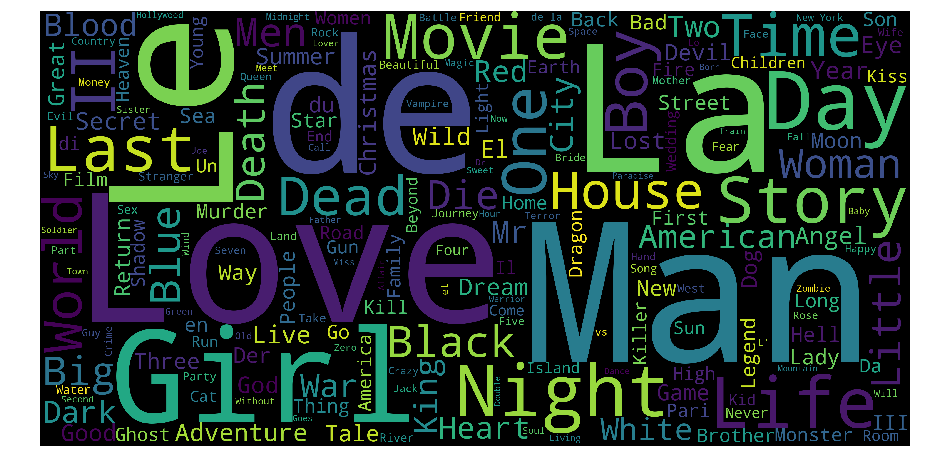

In [6]:
#copied from https://github.com/khanhnamle1994/movielens/blob/master/Content_Based_and_Collaborative_Filtering_Models.ipynb
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [6]:
print(genome_scores.describe())


           movieId        tagId    relevance
count 11709768.000 11709768.000 11709768.000
mean     25842.966      564.500        0.116
std      34676.152      325.625        0.154
min          1.000        1.000        0.000
25%       2926.000      282.750        0.024
50%       6017.000      564.500        0.057
75%      46062.000      846.250        0.141
max     131170.000     1128.000        1.000
         tagId
count 1128.000
mean   564.500
std    325.770
min      1.000
25%    282.750
50%    564.500
75%    846.250
max   1128.000


0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
        ... 
1098    1099
1099    1100
1100    1101
1101    1102
1102    1103
1103    1104
1104    1105
1105    1106
1106    1107
1107    1108
1108    1109
1109    1110
1110    1111
1111    1112
1112    1113
1113    1114
1114    1115
1115    1116
1116    1117
1117    1118
1118    1119
1119    1120
1120    1121
1121    1122
1122    1123
1123    1124
1124    1125
1125    1126
1126    1127
1127    1128
Name: tagId, Length: 1128, dtype: int64